In [2]:
import numpy as np
import matplotlib.pyplot as plt
try:
    plt.style.use("jupyter")
except OSError:
    print("Using default ploting style")

The equation of motion for a 1DOF mass-spring-damper system is

$$
    m\frac{\partial^2\xi}{\partial t^2} + c\frac{\partial \xi}{\partial t} + k\xi = F_{external}
$$

we can divide my the mass everywhere, giving

$$
    \frac{\partial^2\xi}{\partial t^2} + \frac{c}{m}\frac{\partial \xi}{\partial t} + \frac{k}{m}\xi = \frac{F_{external}}{m}.
$$

Using the natural frequency $\omega_n = \sqrt{k/m}$, and the damping ratio $\zeta=c/2m\omega_n$ they become

$$
    \frac{\partial^2\xi}{\partial t^2} + 2\zeta\omega_n\frac{\partial \xi}{\partial t} + \omega_n^2\xi = q.
$$

We can discretize them using second-order finite difference schemes

$$
\frac{2\xi^{n+1} - 5\xi^n + 4\xi^{n-1} - \xi^{n-2}}{\Delta t^2} + \zeta\omega_n\frac{3\xi^{n+1}-4\xi^n + \xi^{n-1}}{\Delta t} + \omega_n^2\xi^n = q^n.
$$

rearranging we obtain

$$
(2 + 3\zeta\omega_n\Delta t)\xi^{n+1} = q^n +(5 + 4\zeta\omega_n\Delta t - \omega_0^2)\xi^{n} - (4 + \zeta\omega_n\Delta t)\xi^{n-1} + \xi^{n-2}
$$

the stifness term can easily be treathed implictely

$$
(2 + 3\zeta\omega_n\Delta t+ \omega_0^2)\xi^{n+1} = q^n +(5 + 4\zeta\omega_n\Delta t)\xi^{n} - (4 + \zeta\omega_n\Delta t)\xi^{n-1} + \xi^{n-2}
$$

an update for a numerical integratiomn therefore reads

$$
\xi^{n+1} = \left(q^n +(5 + 4\zeta\omega_n\Delta t)\xi^{n} - (4 + \zeta\omega_n\Delta t)\xi^{n-1} + \xi^{n-2}\right)(2 + 3\zeta\omega_n\Delta t+ \omega_0^2)^{-1}
$$



In [3]:
class Oscillator(object):
    def __init__(self, dt, xi0, zeta, omega):
        self.dt = dt
        self.t = 0.
        self.zeta = zeta
        self.omega = omega
        self.xi0 = xi0
        self.xi = [xi0, xi0, xi0]
    
    def step(self):
        xi, xi_1, xi_2 = self.xi
        xi_n = ((5+4*self.zeta*self.omega*self.dt)*xi-
                (4+self.zeta*self.omega*self.dt)*xi_1+xi_2) \
                /(2 + 3*self.zeta*self.omega*self.dt+self.omega**2*self.dt**2)
        self.xi = (xi_n, xi, xi_1)
        self.t += self.dt
        
    def step_until(self, tmax, snapshot_dt):
        ts = [self.t]
        vals = [self.xi[0]]
        niter = max(1, int(snapshot_dt // self.dt))
        while self.t < tmax:
            for _ in range(niter):
                self.step()
            vals.append(self.xi[0])
            ts.append(self.t)
        return np.array(ts), np.array(vals)

Generate a new body, with a mass of $m=1$, and mechanical damping of $c=0.5$ and a stifness of $k=10$

In [4]:
body = Oscillator(dt=0.001, xi0=1, zeta=np.sqrt(10)/40, omega=np.sqrt(10))

solve by integrating equations in time

In [5]:
ts, vals = body.step_until(10, 0.1)

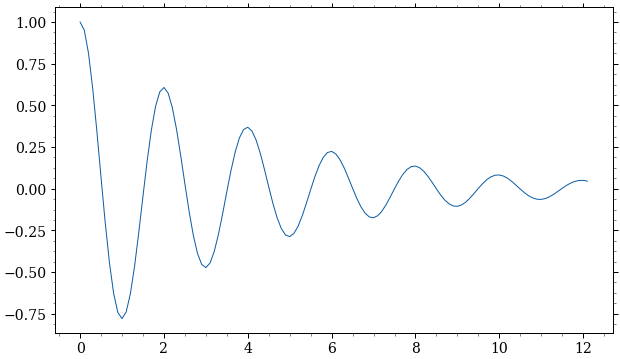

In [6]:
plt.plot(ts, vals);